In [1]:
import pandas as pd
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [2]:
# Load the graph from the .graphml file
G = nx.read_graphml("graphs/all.graphml")
# get the nodes' names
nodes = G.nodes()

In [3]:
# Compute the clustering coefficient for each node
clustering_coefficients = nx.clustering(G)

# Create DataFrame to store the centrality measures
clustering_df = pd.DataFrame({
    'cc': clustering_coefficients
})


In [4]:
# Set the nodes as the index of the DataFrame
clustering_df.index = nodes

# label index as 'researcher_id'
clustering_df.index.name = 'researcher_id'
clustering_df = clustering_df.sort_values(by='cc', ascending=False)
clustering_df['rank'] = clustering_df['cc'].rank(ascending=False, pct=True)

# load cleaned data
clean_data = pd.read_csv('../data_light/data_clean.csv')

# merged centrality_df with clean_data for LMIC and gender columns
clustering_df = clustering_df.merge(clean_data[['researcher_id', 'LMIC', 'gender']], on='researcher_id')

In [7]:
clustering_df = clustering_df.sort_values(by='rank', ascending=True)
clustering_df.head()

,researcher_id,cc,rank,LMIC,gender
0,ur.01006172666.33,1.0,0.333585,0,female
5,ur.012701773077.66,1.0,0.333585,0,male
6,ur.015642421427.93,1.0,0.333585,0,NaN
7,ur.0733261754.35,1.0,0.333585,0,NaN
8,ur.0706537734.16,1.0,0.333585,0,male


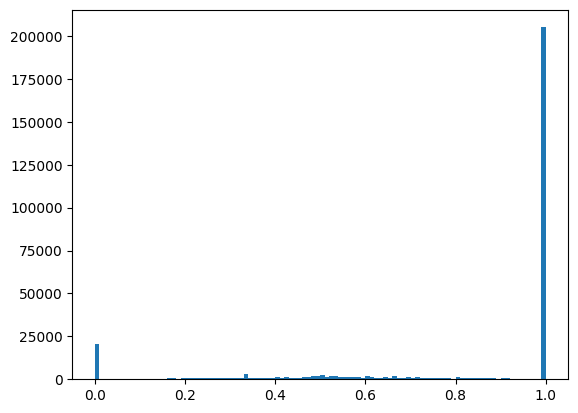

In [9]:
# plot distribution of clustering coefficient
plt.hist(clustering_df['cc'], bins=100)
plt.show()

In [11]:
# get the percentage of LMIC researchers where cc = 1
clustering_df[clustering_df['cc'] == 1]['gender'].value_counts(normalize=True)

male      0.668189
female    0.331811
Name: gender, dtype: float64